# AS03: Similaridade Textual

Aluno: Gustavo Martins Lopes da Costa

Matrícula: 690773

In [ ]:
from google.colab import drive
import seaborn as sns # utilizado para plotar os heatmaps
# drive.mount('/content/drive') # utilizado para conectar ao google drive

## Importação do dataset
---

Insira o caminho para o arquivo ``headlines.txt`` na variável abaixo:

In [ ]:
dataset_path = ""

Visualização do dataset

In [ ]:
headline_file = open(dataset_path, "r")
headlines = []
for headline in headline_file:
  headlines.append(headline.lower())
headlines

['investors unfazed by correction as crypto funds see $154 million inflows\n',
 'bitcoin, ethereum prices continue descent, but crypto funds see inflows\n',
 'the surge in euro area inflation during the pandemic: transitory but with upside risks\n',
 "inflation: why it's temporary and raising interest rates will do more harm than good\n",
 'will cryptocurrency protect against inflation?\n',
 'tweed is a crypto wallet api to add a web3 flavor to any web service\n',
 'who created bitcoin? learn about the biggest cryptos, including dogecoin, big eyes coin\n',
 'cryptocurrency prices and news: bitcoin, cryptos fall after silvergate bank liquidation news\n',
 'silvergate capital to shut down, liquidate crypto-friendly silvergate bank\n',
 'dow jones rises on surprise jump in jobless claims; bitcoin drops as crypto bank silvergate crashes 40%\n']

## Geração de Embeddings
---
Inicialmente faremos a geração de embeddings utilizando as seguintes técnicas:
 - ``One Hot Encoding``.
 - ``Count Vector``.
 - ``Ngrams`` com n = 2.
 - ``TF-IDF``
 - ``Co-occurence Vectors``
 - ``Word2Vec``(NLP)

### One Hot Encoding

In [ ]:
import numpy as np

In [ ]:
def get_tokens(doc):
  tokens = doc.split()
  cleaned_text = [w.lower() for w in tokens]
  return cleaned_text

In [ ]:
def tokenize(corpus):
  words = []
  for doc in corpus:
    w = get_tokens(doc)
    words.extend(w)
    words = sorted(list(set(words)))
  return words

In [ ]:
def one_hot_encoding(corpus, vocab):
  one_hot_list = []
  for doc in corpus:
    words = get_tokens(doc)
    bag_vector = np.zeros(len(vocab))
    for word in words:
      for i, vocab_word in enumerate(vocab):
        if word == vocab_word:
          bag_vector[i] = 1
    one_hot_list.append(list(bag_vector))
  return one_hot_list

In [ ]:
vocab = tokenize(headlines)
one_hot_embeddings = one_hot_encoding(headlines, vocab)
one_hot_embeddings

[[1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0

### Count Vector

In [ ]:
def count_vector(corpus, vocab):
  count_vector_list = []
  for doc in corpus:
    words = get_tokens(doc)
    bag_vector = np.zeros(len(vocab))
    for word in words:
      for i, vocab_word in enumerate(vocab):
        if word == vocab_word:
          bag_vector[i] = 1
    count_vector_list.append(list(bag_vector))
  return count_vector_list

In [ ]:
cv_embeddings = count_vector(headlines, vocab)
cv_embeddings

[[1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0

### N-Grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2,2))
docTermMatrix = vectorizer.fit_transform(headlines)
ngrams_embeddings = vectorizer.get_feature_names_out()
ngrams_embeddings = list(docTermMatrix.A)
ngrams_embeddings

[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
entries = [headline.split(" ") for headline in headlines]
entries

[['investors',
  'unfazed',
  'by',
  'correction',
  'as',
  'crypto',
  'funds',
  'see',
  '$154',
  'million',
  'inflows\n'],
 ['bitcoin,',
  'ethereum',
  'prices',
  'continue',
  'descent,',
  'but',
  'crypto',
  'funds',
  'see',
  'inflows\n'],
 ['the',
  'surge',
  'in',
  'euro',
  'area',
  'inflation',
  'during',
  'the',
  'pandemic:',
  'transitory',
  'but',
  'with',
  'upside',
  'risks\n'],
 ['inflation:',
  'why',
  "it's",
  'temporary',
  'and',
  'raising',
  'interest',
  'rates',
  'will',
  'do',
  'more',
  'harm',
  'than',
  'good\n'],
 ['will', 'cryptocurrency', 'protect', 'against', 'inflation?\n'],
 ['tweed',
  'is',
  'a',
  'crypto',
  'wallet',
  'api',
  'to',
  'add',
  'a',
  'web3',
  'flavor',
  'to',
  'any',
  'web',
  'service\n'],
 ['who',
  'created',
  'bitcoin?',
  'learn',
  'about',
  'the',
  'biggest',
  'cryptos,',
  'including',
  'dogecoin,',
  'big',
  'eyes',
  'coin\n'],
 ['cryptocurrency',
  'prices',
  'and',
  'news:',
  'b

### TF_IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(smooth_idf = False)
tf_idf_embeddings = tf_idf.fit_transform(headlines).A

### Co-Occurrence

In [ ]:
vectorizer = CountVectorizer()
docTermMatrix = vectorizer.fit_transform(headlines)
vocabulary = vectorizer.get_feature_names_out()
co_occ_embeddings = list(docTermMatrix.A)
co_occ_embeddings

[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1]),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Word2Vec

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp_embeddings = list([nlp(headline).vector for headline in headlines])
print(nlp_embeddings[1])

[-0.2766643   0.29832953 -0.59474885 -0.00896307  0.41298768  0.45171487
  0.4890162   0.38568342  0.35756767 -0.31604007  0.3583988  -0.23316509
 -0.562357   -0.56216145  0.07484175  0.02758531 -0.00721831 -0.16472973
 -0.39805773 -0.40703985  0.04931257  0.1014622  -0.12078866  0.02751956
 -0.1683724   0.25199592  0.2114256   0.72512555  0.24811104 -0.17251822
 -0.02893938  0.12318627  0.15241309 -0.1692694   0.02610428 -0.59110945
  0.07383462 -0.08129648 -0.54945934  0.27056354 -0.33993354 -0.20726684
 -0.34312385  0.05514263  0.12490959  0.21294227  0.415055    0.03494871
  0.53388655 -0.24943508 -0.1924075  -0.40703726  0.10267472 -0.06088416
  0.38052303 -0.12437171 -0.00983596 -0.43774393  0.28051087  0.18923062
 -0.20448692  0.04974107  0.1069416  -0.0058571   0.5070854   0.22956347
 -0.4889015  -0.01731187 -0.02378398  0.03100031 -0.02452273  0.33547467
  0.5134744  -0.46601695  0.5648461   0.08108672 -0.37136775 -0.5378002
  0.07924314 -0.47716168 -0.1056753  -0.38309354 -0.

## Aplicando a similaridade textual
---

Abaixo são calculadas as métricas para cada tipo de embedding.

### Jaccard Index

In [ ]:
def jaccard_index(x, y):
	intersection_size = len(set.intersection(*[set(x)], set(y)))
	union_size = len(set.union(*[set(x), set(y)]))
	return intersection_size / float(union_size)

In [ ]:
one_hot_result = np.zeros((len(one_hot_embeddings), len(one_hot_embeddings)))
for i in range (0, len(one_hot_embeddings)):
  for j in range(0, len(one_hot_embeddings)):
    one_hot_result[i][j] = jaccard_index(one_hot_embeddings[i], one_hot_embeddings[j])
one_hot_result

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Count Vector

<Axes: >

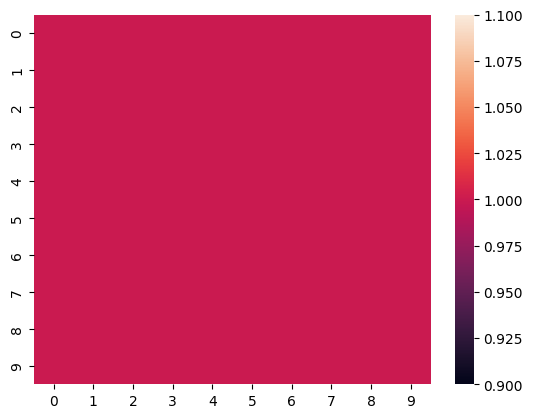

In [ ]:
cv_result = np.zeros((len(cv_embeddings), len(cv_embeddings)))
for i in range (0, len(cv_embeddings)):
  for j in range(0, len(cv_embeddings)):
    cv_result[i][j] = jaccard_index(cv_embeddings[i], cv_embeddings[j])
cv_result
sns.heatmap(cv_result)

TF_IDF

<Axes: >

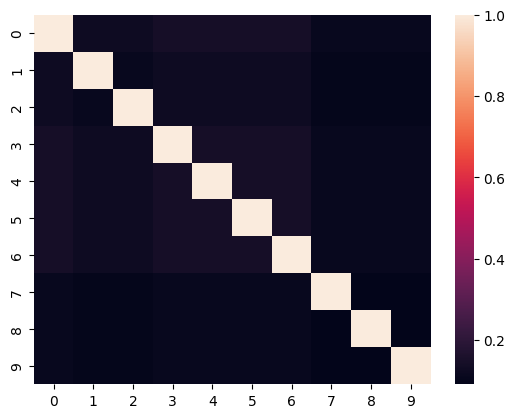

In [ ]:
jaccard_index(tf_idf_embeddings[0], tf_idf_embeddings[1])
tf_idf_result = np.zeros((len(tf_idf_embeddings), len(tf_idf_embeddings)))
for i in range (0, len(tf_idf_embeddings)):
  for j in range(0, len(tf_idf_embeddings)):
    tf_idf_result[i][j] = jaccard_index(tf_idf_embeddings[i], tf_idf_embeddings[j])

sns.heatmap(tf_idf_result)

In [ ]:
tf_idf_result

array([[1.        , 0.125     , 0.125     , 0.14285714, 0.14285714,
        0.14285714, 0.14285714, 0.11111111, 0.11111111, 0.11111111],
       [0.125     , 1.        , 0.11111111, 0.125     , 0.125     ,
        0.125     , 0.125     , 0.1       , 0.1       , 0.1       ],
       [0.125     , 0.11111111, 1.        , 0.125     , 0.125     ,
        0.125     , 0.125     , 0.1       , 0.1       , 0.1       ],
       [0.14285714, 0.125     , 0.125     , 1.        , 0.14285714,
        0.14285714, 0.14285714, 0.11111111, 0.11111111, 0.11111111],
       [0.14285714, 0.125     , 0.125     , 0.14285714, 1.        ,
        0.14285714, 0.14285714, 0.11111111, 0.11111111, 0.11111111],
       [0.14285714, 0.125     , 0.125     , 0.14285714, 0.14285714,
        1.        , 0.14285714, 0.11111111, 0.11111111, 0.11111111],
       [0.14285714, 0.125     , 0.125     , 0.14285714, 0.14285714,
        0.14285714, 1.        , 0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.1       , 0.1      

Co-ocurrence

<Axes: >

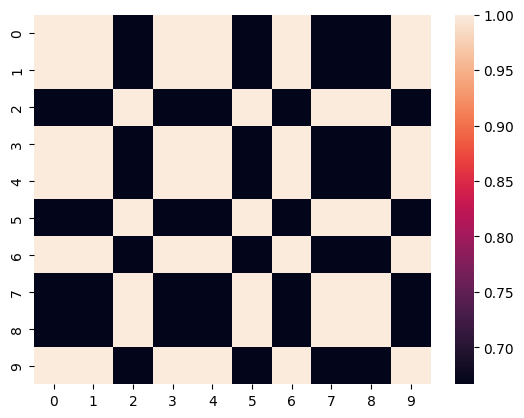

In [ ]:
co_result = np.zeros((len(co_occ_embeddings), len(co_occ_embeddings)))
for i in range (0, len(co_occ_embeddings)):
  for j in range(0, len(co_occ_embeddings)):
    co_result[i][j] = jaccard_index(co_occ_embeddings[i], co_occ_embeddings[j])
sns.heatmap(co_result)

In [ ]:
co_result

array([[1.        , 1.        , 0.66666667, 1.        , 1.        ,
        0.66666667, 1.        , 0.66666667, 0.66666667, 1.        ],
       [1.        , 1.        , 0.66666667, 1.        , 1.        ,
        0.66666667, 1.        , 0.66666667, 0.66666667, 1.        ],
       [0.66666667, 0.66666667, 1.        , 0.66666667, 0.66666667,
        1.        , 0.66666667, 1.        , 1.        , 0.66666667],
       [1.        , 1.        , 0.66666667, 1.        , 1.        ,
        0.66666667, 1.        , 0.66666667, 0.66666667, 1.        ],
       [1.        , 1.        , 0.66666667, 1.        , 1.        ,
        0.66666667, 1.        , 0.66666667, 0.66666667, 1.        ],
       [0.66666667, 0.66666667, 1.        , 0.66666667, 0.66666667,
        1.        , 0.66666667, 1.        , 1.        , 0.66666667],
       [1.        , 1.        , 0.66666667, 1.        , 1.        ,
        0.66666667, 1.        , 0.66666667, 0.66666667, 1.        ],
       [0.66666667, 0.66666667, 1.       

NLP

<Axes: >

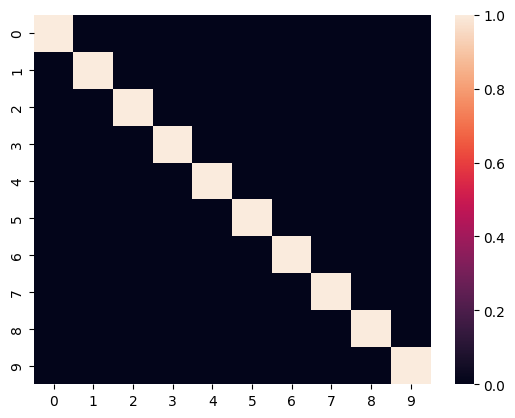

In [ ]:
nlp_result = np.zeros((len(nlp_embeddings), len(nlp_embeddings)))
for i in range (0, len(nlp_embeddings)):
  for j in range(0, len(nlp_embeddings)):
    nlp_result[i][j] = jaccard_index(nlp_embeddings[i], nlp_embeddings[j])
sns.heatmap(nlp_result)

In [ ]:
nlp_result

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Distância de Manhattan
---

In [ ]:
def manhattan_dist(x, y):
	return sum(abs(a-b) for a, b in zip(x,y))

One Hot Encoding

<Axes: >

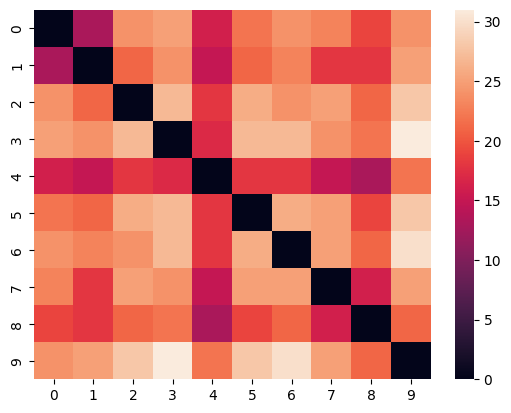

In [ ]:
one_hot_result = np.zeros((len(one_hot_embeddings), len(one_hot_embeddings)))
for i in range (0, len(one_hot_embeddings)):
  for j in range(0, len(one_hot_embeddings)):
    one_hot_result[i][j] = manhattan_dist(one_hot_embeddings[i], one_hot_embeddings[j])
sns.heatmap(one_hot_result)

Ngrams

<Axes: >

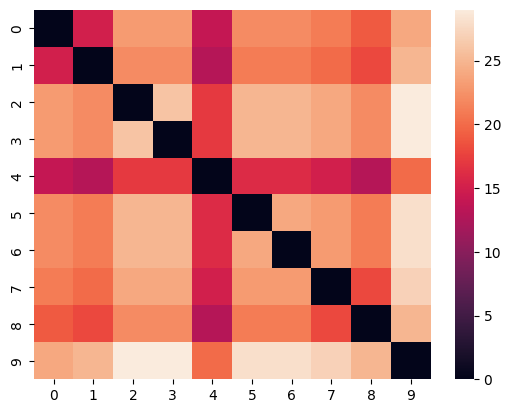

In [ ]:
n_grams_result = np.zeros((len(ngrams_embeddings), len(ngrams_embeddings)))
for i in range (0, len(ngrams_embeddings)):
  for j in range(0, len(ngrams_embeddings)):
    n_grams_result[i][j] = manhattan_dist(ngrams_embeddings[i], ngrams_embeddings[j])
sns.heatmap(n_grams_result)

tf_idf

<Axes: >

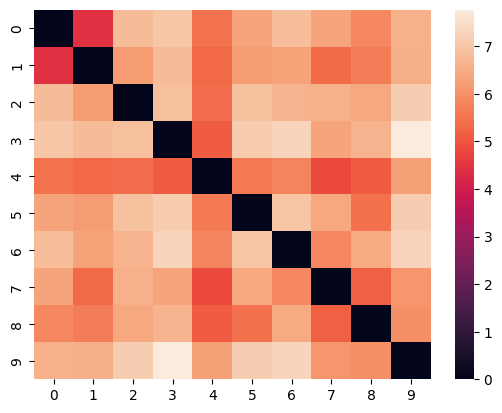

In [ ]:
tf_idf_result = np.zeros((len(tf_idf_embeddings), len(tf_idf_embeddings)))
for i in range (0, len(tf_idf_embeddings)):
  for j in range(0, len(tf_idf_embeddings)):
    tf_idf_result[i][j] = manhattan_dist(tf_idf_embeddings[i], tf_idf_embeddings[j])
sns.heatmap(tf_idf_result)

Co-ocurrence

<Axes: >

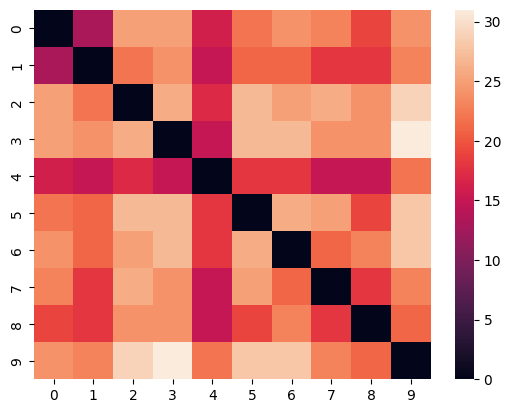

In [ ]:
co_result = np.zeros((len(co_occ_embeddings), len(co_occ_embeddings)))
for i in range (0, len(co_occ_embeddings)):
  for j in range(0, len(co_occ_embeddings)):
    co_result[i][j] = manhattan_dist(co_occ_embeddings[i], co_occ_embeddings[j])
sns.heatmap(co_result)

Word2vec

<Axes: >

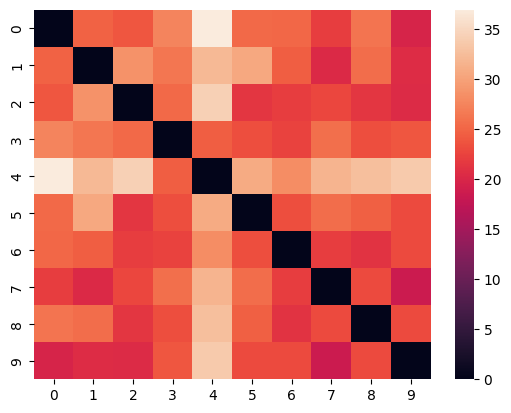

In [ ]:
nlp_result = np.zeros((len(nlp_embeddings), len(nlp_embeddings)))
for i in range (0, len(nlp_embeddings)):
  for j in range(0, len(nlp_embeddings)):
    nlp_result[i][j] = manhattan_dist(nlp_embeddings[i], nlp_embeddings[j])
sns.heatmap(nlp_result)

### Distância Euclidiana
---

In [ ]:
from math import sqrt, pow, exp
def euclidian_dist(x, y):
	return sqrt(sum(pow(a - b, 2)for a, b in zip(x,y)))

One Hot

<Axes: >

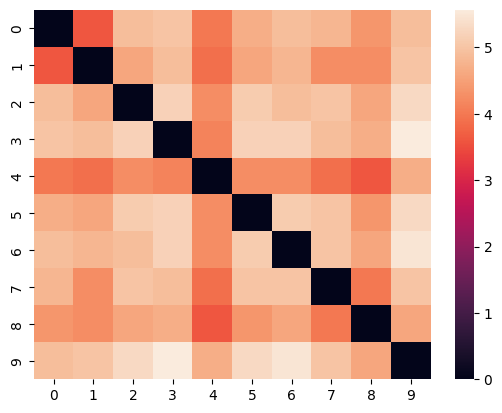

In [ ]:
one_hot_result = np.zeros((len(one_hot_embeddings), len(one_hot_embeddings)))
for i in range (0, len(one_hot_embeddings)):
  for j in range(0, len(one_hot_embeddings)):
    one_hot_result[i][j] = euclidian_dist(one_hot_embeddings[i], one_hot_embeddings[j])
sns.heatmap(one_hot_result)

Count Vector

<Axes: >

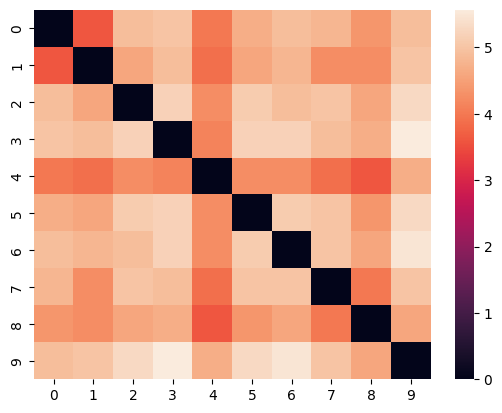

In [ ]:
cv_result = np.zeros((len(cv_embeddings), len(cv_embeddings)))
for i in range (0, len(cv_embeddings)):
  for j in range(0, len(cv_embeddings)):
    cv_result[i][j] = euclidian_dist(cv_embeddings[i], cv_embeddings[j])
sns.heatmap(cv_result)

Ngrams

In [ ]:
ngrams_result = np.zeros((len(ngrams_embeddings), len(ngrams_embeddings)))
for i in range (0, len(ngrams_embeddings)):
  for j in range(0, len(ngrams_embeddings)):
    ngrams_result[i][j] = euclidian_dist(ngrams_embeddings[i], ngrams_embeddings[j])
sns.heatmap(ngrams_result)

<Axes: >

TF_IDF

In [ ]:
tf_idf_result = np.zeros((len(tf_idf_embeddings), len(tf_idf_embeddings)))
for i in range (0, len(tf_idf_embeddings)):
  for j in range(0, len(tf_idf_embeddings)):
    tf_idf_result[i][j] = euclidian_dist(tf_idf_embeddings[i], tf_idf_embeddings[j])
sns.heatmap(tf_idf_result)

Co-occurence

In [ ]:
co_result = np.zeros((len(co_occ_embeddings), len(co_occ_embeddings)))
for i in range (0, len(co_occ_embeddings)):
  for j in range(0, len(co_occ_embeddings)):
    co_result[i][j] = euclidian_dist(co_occ_embeddings[i], co_occ_embeddings[j])
sns.heatmap(co_result)

NLP

In [ ]:
nlp_result = np.zeros((len(nlp_embeddings), len(nlp_embeddings)))
for i in range (0, len(nlp_embeddings)):
  for j in range(0, len(nlp_embeddings)):
    nlp_result[i][j] = euclidian_dist(nlp_embeddings[i], nlp_embeddings[j])
sns.heatmap(nlp_result)

### Distância de Minkowski
---

In [ ]:
from math import *
from decimal import Decimal

def nth_root(value, n_root):
  root_value = 1 / float(n_root)
  return round(Decimal(value) ** Decimal(root_value), 3)

def minkowski_dist(x, y, p):
  return nth_root(sum(pow(abs(a - b), p) for a,b in zip(x, y)), p)

One Hot

In [ ]:
one_hot_result = np.zeros((len(one_hot_embeddings), len(one_hot_embeddings)))
for i in range (0, len(one_hot_embeddings)):
  for j in range(0, len(one_hot_embeddings)):
    one_hot_result[i][j] = minkowski_dist(one_hot_embeddings[i], one_hot_embeddings[j], 3)
sns.heatmap(one_hot_result)

Count Vector

In [ ]:
cv_result = np.zeros((len(cv_embeddings), len(cv_embeddings)))
for i in range (0, len(cv_embeddings)):
  for j in range(0, len(cv_embeddings)):
    cv_result[i][j] = minkowski_dist(cv_embeddings[i], cv_embeddings[j], 3)
sns.heatmap(cv_result)

Ngrams

In [ ]:
ngrams_result = np.zeros((len(ngrams_embeddings), len(ngrams_embeddings)))
for i in range (0, len(ngrams_embeddings)):
  for j in range(0, len(ngrams_embeddings)):
    ngrams_result[i][j] = minkowski_dist(ngrams_embeddings[i], ngrams_embeddings[j], 3)
sns.heatmap(ngrams_result)

TF_IDF

In [ ]:
tf_idf_result = np.zeros((len(tf_idf_embeddings), len(tf_idf_embeddings)))
for i in range (0, len(tf_idf_embeddings)):
  for j in range(0, len(tf_idf_embeddings)):
    tf_idf_result[i][j] = minkowski_dist(tf_idf_embeddings[i], tf_idf_embeddings[j], 3)
sns.heatmap(tf_idf_result)

Co-occurrence

In [ ]:
co_result = np.zeros((len(co_occ_embeddings), len(co_occ_embeddings)))
for i in range (0, len(co_occ_embeddings)):
  for j in range(0, len(co_occ_embeddings)):
    co_result[i][j] = minkowski_dist(co_occ_embeddings[i], co_occ_embeddings[j], 3)
sns.heatmap(co_result)

Word2Vec

In [ ]:
nlp_result = np.zeros((len(nlp_embeddings), len(nlp_embeddings)))
for i in range (0, len(nlp_embeddings)):
  for j in range(0, len(nlp_embeddings)):
    nlp_result[i][j] = minkowski_dist(nlp_embeddings[i], nlp_embeddings[j], 3)
sns.heatmap(nlp_result)

### Similaridade de Cosseno

In [ ]:
def square_rooted(x):
  return round(sqrt(sum([a * a for a in x])), 3)

def cosine_similarity(x, y):
  numerator = sum(a * b for a, b in zip(x, y))
  denominator = square_rooted(x) * square_rooted(y)
  return round(numerator / float(denominator), 3)

One Hot

In [ ]:
one_hot_result = np.zeros((len(one_hot_embeddings), len(one_hot_embeddings)))
for i in range (0, len(one_hot_embeddings)):
  for j in range(0, len(one_hot_embeddings)):
    one_hot_result[i][j] = cosine_similarity(one_hot_embeddings[i], one_hot_embeddings[j])
sns.heatmap(one_hot_result)

Count Vector

In [ ]:
cv_result = np.zeros((len(cv_embeddings), len(cv_embeddings)))
for i in range (0, len(cv_embeddings)):
  for j in range(0, len(cv_embeddings)):
    cv_result[i][j] = cosine_similarity(cv_embeddings[i], cv_embeddings[j])
sns.heatmap(cv_result)

Ngrams

In [ ]:
ngrams_result = np.zeros((len(ngrams_embeddings), len(ngrams_embeddings)))
for i in range (0, len(ngrams_embeddings)):
  for j in range(0, len(ngrams_embeddings)):
    ngrams_result[i][j] = cosine_similarity(ngrams_embeddings[i], ngrams_embeddings[j])
sns.heatmap(ngrams_result)

TF_IDF

In [ ]:
tf_idf_result = np.zeros((len(tf_idf_embeddings), len(tf_idf_embeddings)))
for i in range (0, len(tf_idf_embeddings)):
  for j in range(0, len(tf_idf_embeddings)):
    tf_idf_result[i][j] = cosine_similarity(tf_idf_embeddings[i], tf_idf_embeddings[j])
sns.heatmap(tf_idf_result)


Co-occurrence

In [ ]:
co_result = np.zeros((len(co_occ_embeddings), len(co_occ_embeddings)))
for i in range (0, len(co_occ_embeddings)):
  for j in range(0, len(co_occ_embeddings)):
    co_result[i][j] = cosine_similarity(co_occ_embeddings[i], co_occ_embeddings[j])
sns.heatmap(co_result)

NLP

In [ ]:
nlp_result = np.zeros((len(nlp_embeddings), len(nlp_embeddings)))
for i in range (0, len(nlp_embeddings)):
  for j in range(0, len(nlp_embeddings)):
    nlp_result[i][j] = cosine_similarity(nlp_embeddings[i], nlp_embeddings[j])
sns.heatmap(nlp_result)